# Análisis Exploratorio de Datos (EDA)

## Índice de Contenido

1. [Preparación del entorno y carga de datos](#1.-Preparación-del-entorno-y-carga-de-datos)
2. [Análisis de variables numéricas](#2.-Análisis-de-variables-numéricas)
   - [Distribuciones y estadísticas](#2.1-Distribuciones-y-estadísticas)
   - [Relación con la variable objetivo](#2.2-Relación-con-la-variable-objetivo)
3. [Análisis de variables categóricas](#3.-Análisis-de-variables-categóricas)
   - [Distribuciones](#3.1-Distribuciones)
   - [Relación con la variable objetivo](#3.2-Relación-con-la-variable-objetivo)
4. [Análisis de equidad por género](#4.-Análisis-de-equidad-por-género)
   - [Distribución por género](#4.1-Distribución-por-género)
   - [Tasas de aprobación por género](#4.2-Tasas-de-aprobación-por-género)
5. [Conclusiones](#5.-Conclusiones)

## 1. Preparación del entorno y carga de datos

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tp_final_fairness_ML.utils.preprocessing import convertir_object_a_categ
import os 

# Carga de datos
ruta_archivo = os.path.join('..', 'data', 'processed', 'german_credit_data.csv')
g_credit_data = pd.read_csv(ruta_archivo)

# Conversión de columnas tipo objeto a categóricas para mejor manejo
g_credit_data = convertir_object_a_categ(g_credit_data)

In [3]:
# Vista general de los datos
print(f"Dimensiones del dataset: {g_credit_data.shape[0]} filas × {g_credit_data.shape[1]} columnas\n")
print("Primeras 5 filas:")
g_credit_data.head()

Dimensiones del dataset: 1000 filas × 23 columnas

Primeras 5 filas:


,checking_account,duration,credit_history,purpose,credit_amount,savings_account,employment_since,installment_rate,personal_status_sex,other_debtors,...,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,target,genre,target_label
0,< 0 DM,6,critical account / other bank,radio/TV,1169,unknown / no account,>= 7 years,4,"male, single",none,...,none,own,2,skilled / official,1,"yes, registered",yes,1,male,low_risk
1,0 <= ... < 200 DM,48,paid duly till now,radio/TV,5951,< 100 DM,1 <= ... < 4 years,2,"female, div/sep/married",none,...,none,own,1,skilled / official,1,none,yes,2,female,high_risk
2,no account,12,critical account / other bank,education,2096,< 100 DM,4 <= ... < 7 years,2,"male, single",none,...,none,own,1,unskilled - resident,2,none,yes,1,male,low_risk
3,< 0 DM,42,paid duly till now,furniture/equipment,7882,< 100 DM,4 <= ... < 7 years,2,"male, single",guarantor,...,none,for free,1,skilled / official,2,none,yes,1,male,low_risk
4,< 0 DM,24,delay in past,car (new),4870,< 100 DM,1 <= ... < 4 years,3,"male, single",none,...,none,for free,2,skilled / official,2,none,yes,2,male,high_risk


In [4]:
# Información general sobre el dataset
g_credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   checking_account         1000 non-null   category
 1   duration                 1000 non-null   int64   
 2   credit_history           1000 non-null   category
 3   purpose                  1000 non-null   category
 4   credit_amount            1000 non-null   int64   
 5   savings_account          1000 non-null   category
 6   employment_since         1000 non-null   category
 7   installment_rate         1000 non-null   int64   
 8   personal_status_sex      1000 non-null   category
 9   other_debtors            1000 non-null   category
 10  residence_since          1000 non-null   int64   
 11  property                 1000 non-null   category
 12  age                      1000 non-null   int64   
 13  other_installment_plans  1000 non-null   category
 14  housing  

## 2. Análisis de variables numéricas

Comenzamos analizando las variables numéricas del conjunto de datos para entender su distribución, tendencias centrales y relación con la variable objetivo (riesgo crediticio).

### 2.1 Distribuciones y estadísticas

Utilizamos la función `.describe()` para obtener estadísticas descriptivas de las variables numéricas:

In [5]:
g_credit_data.select_dtypes(include=['int64', 'float64']).describe()

,duration,credit_amount,installment_rate,residence_since,age,number_credits,people_liable,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


Y visualizamos las distribuciones de las variables numéricas exceptuando a la variable objetivo:

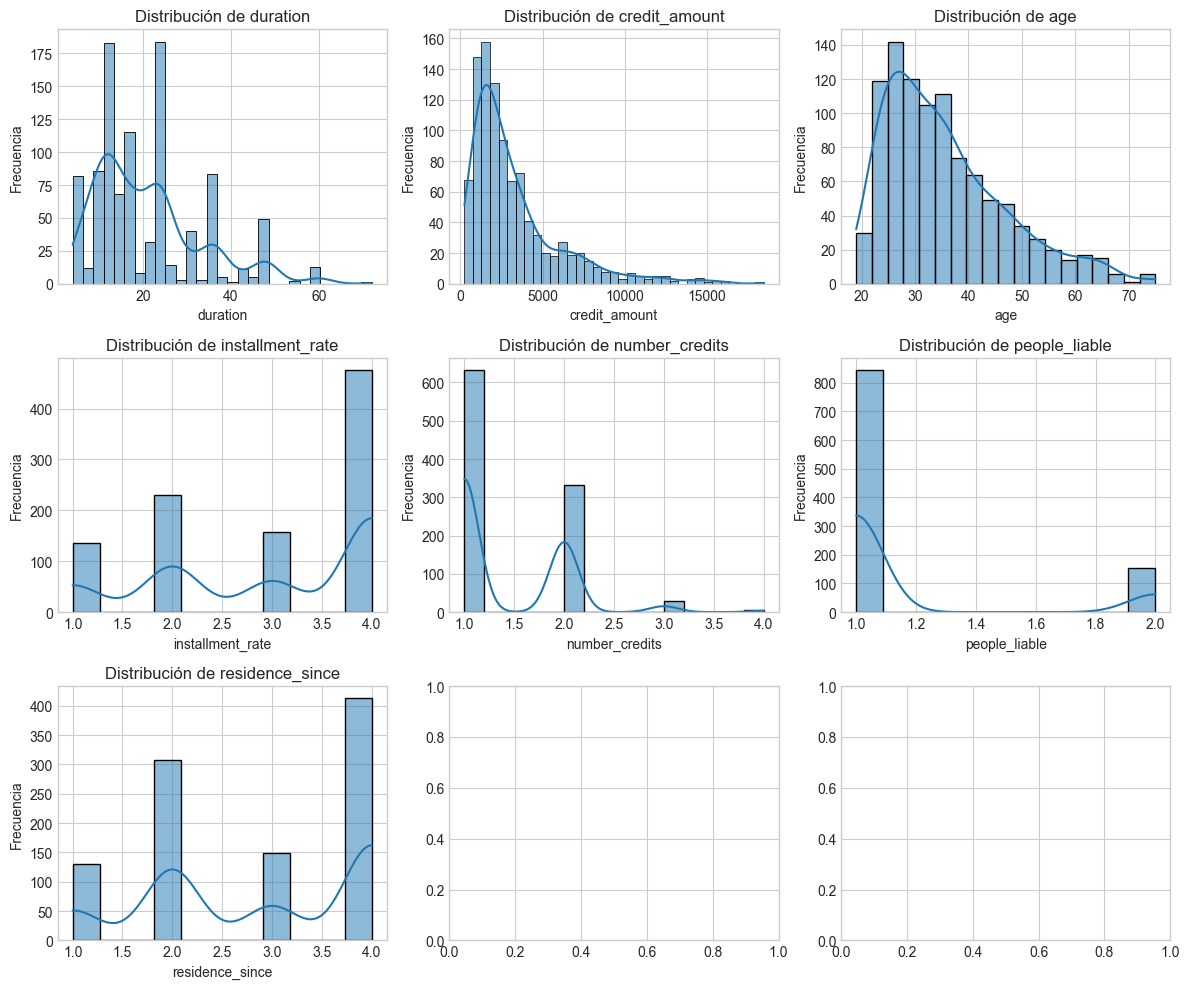

In [6]:
from tp_final_fairness_ML.utils.plotting import visualizar_distribuciones

variables_numericas = ['duration', 'credit_amount', 'age', 'installment_rate', 'number_credits', 'people_liable', 'residence_since']
visualizar_distribuciones(g_credit_data, variables_numericas, filas = 3, columnas= 3)

**Observaciones sobre las variables numéricas:**

- **duration**: La duración media del crédito es de aproximadamente 21 meses, con un rango de 4 a 72 meses.
- **credit_amount**: El monto promedio de crédito es de 3,271 DM, con una variabilidad considerable (desviación estándar de 2,823 DM).
- **age**: La edad promedio de los solicitantes es de 35.5 años, con un mínimo de 19 y un máximo de 75 años.
- **installment_rate**: La tasa de pago promedio es de aproximadamente 3 (en porcentaje del ingreso disponible).
- **target**: La variable objetivo tiene un valor medio de 1.3, lo que indica que aproximadamente el 30% de los préstamos están clasificados como de alto riesgo (valor 2).

### 2.2 Relación con la variable objetivo

Exploramos cómo las variables numéricas se relacionan con la clasificación de riesgo crediticio.

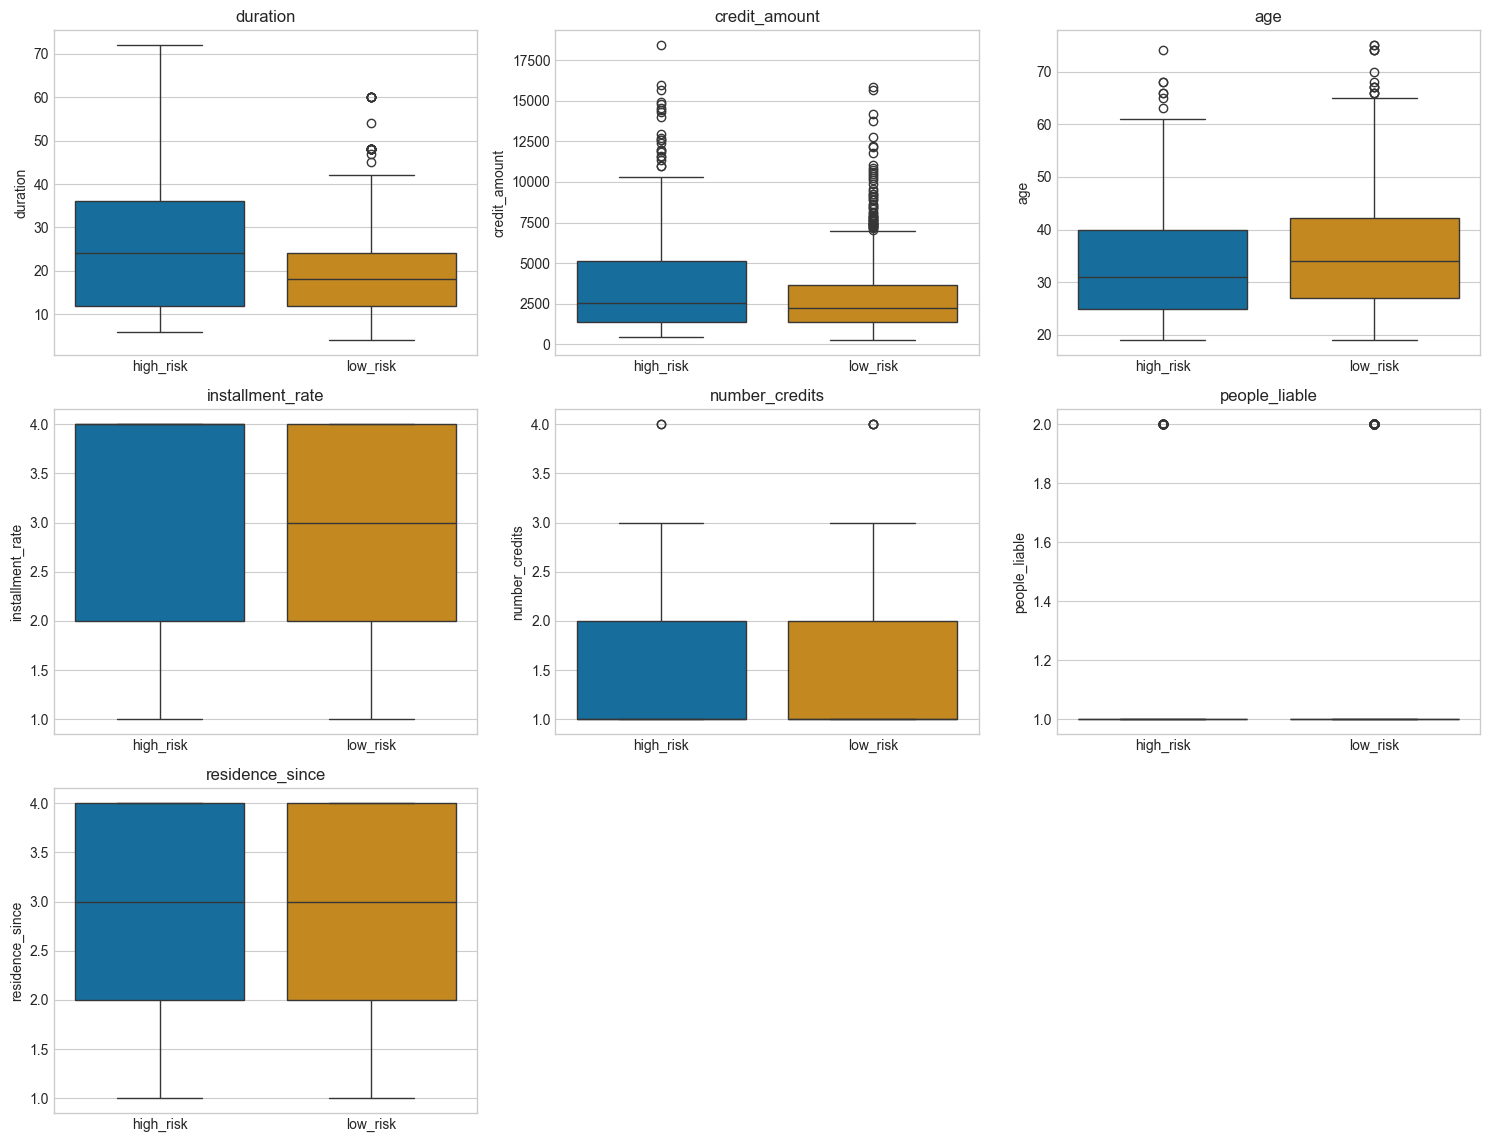

In [7]:
from tp_final_fairness_ML.utils.plotting import graficar_columnas

graficar_columnas(g_credit_data, variables_numericas, 'target_label', 'boxplot')

**Análisis de la relación entre variables numéricas y riesgo crediticio:**

- **duration**: Los préstamos clasificados como de alto riesgo tienden a tener una duración mayor. Esto podría indicar que préstamos a más largo plazo se asocian con mayor probabilidad de incumplimiento.
- **credit_amount**: Los préstamos de alto riesgo suelen tener montos ligeramente más altos, aunque la diferencia no es tan marcada como en otras variables.
- **age**: Los solicitantes más jóvenes parecen ser clasificados como de alto riesgo con mayor frecuencia.
- **installment_rate**: Las tasas de pago más altas se asocian moderadamente con clasificaciones de alto riesgo.
- **residence_since**: No se observa una diferencia significativa entre las categorías de riesgo en función del tiempo de residencia.

## 3. Análisis de variables categóricas

Analizamos ahora las variables categóricas para entender su distribución y relación con la variable objetivo.

### 3.1 Distribuciones y estadísticas

In [8]:
g_credit_data.describe(include='category')

,checking_account,credit_history,purpose,savings_account,employment_since,personal_status_sex,other_debtors,property,other_installment_plans,housing,job,telephone,foreign_worker,genre,target_label
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2,2,2
top,no account,paid duly till now,radio/TV,< 100 DM,1 <= ... < 4 years,"male, single",none,car / other,none,own,skilled / official,none,yes,male,low_risk
freq,394,530,280,603,339,548,907,332,814,713,630,596,963,690,700


**Observaciones sobre las variables categóricas:**

* **credit_history**: Al momento de solicitar un préstamo, un solicitante suele tener todos sus préstamos pagados debidamente.
* **personal_status_sex**: Los solicitantes son mayormente hombres solteros.
* **housing**: Los solicitantes en gran mayoría son dueños de la casa que habitan.
* **job**: Los solicitantes en gran mayoría tienen trabajos estables.
* **foreign_worker**: La mayoría son trabajadores extranjeros.

### 3.2 Relación con la variable objetivo

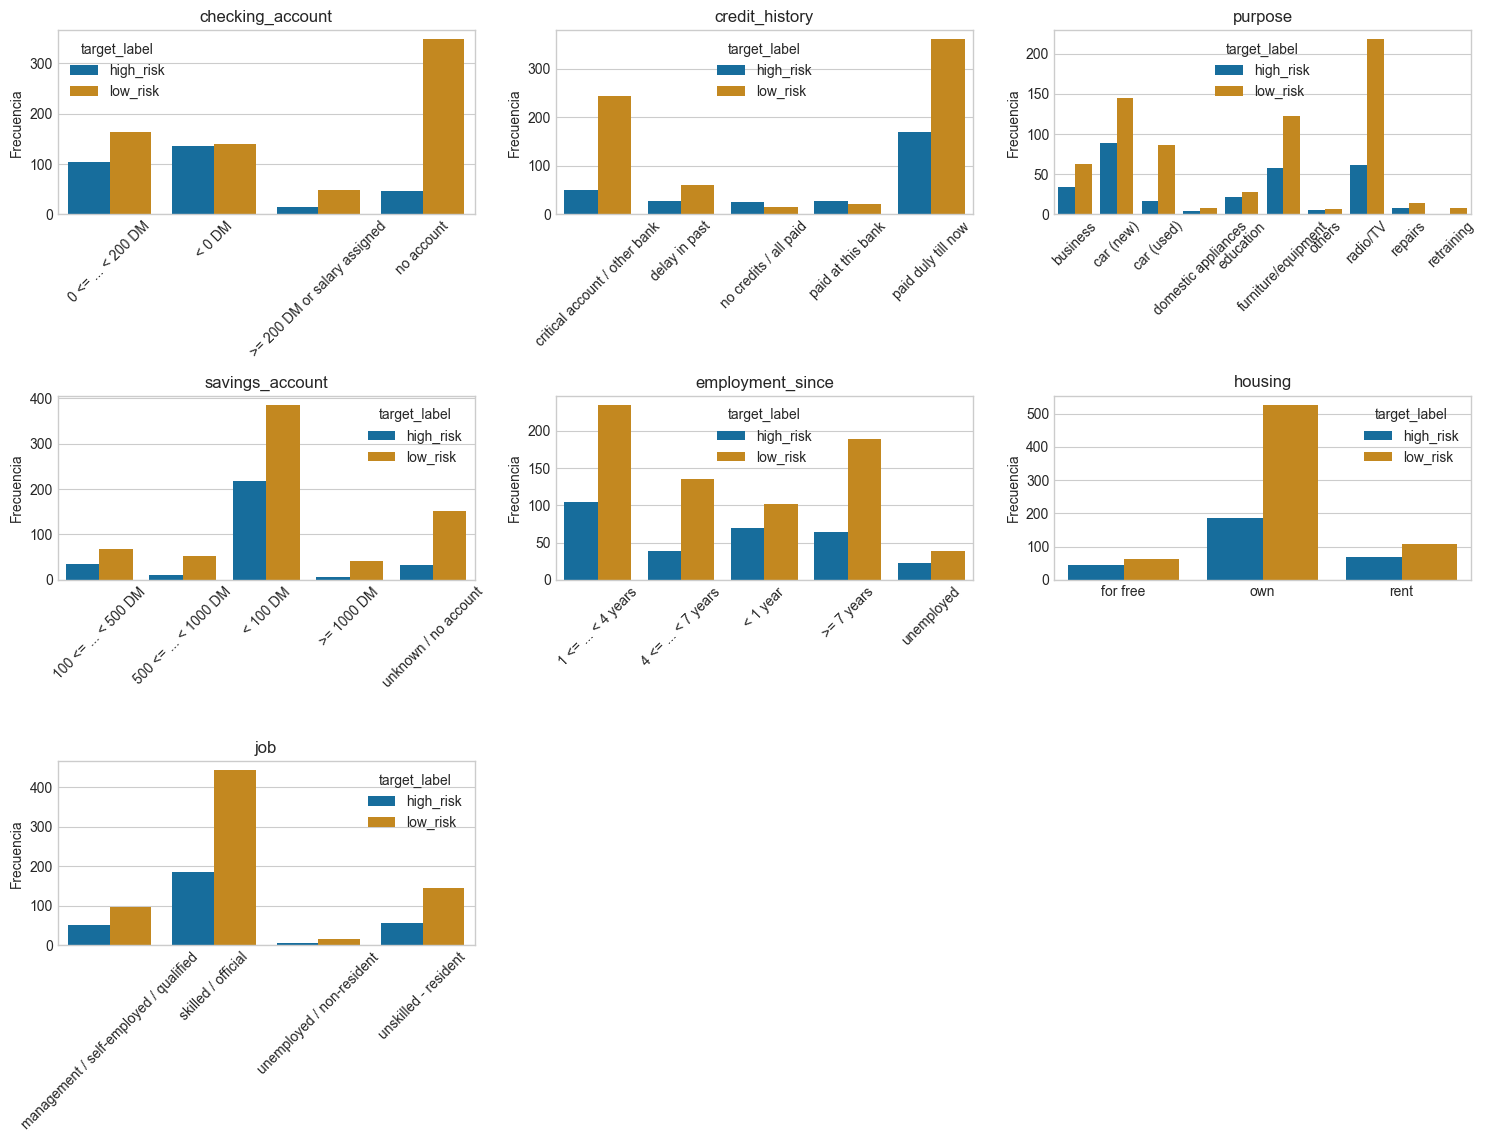

In [9]:
cat_cols = ['checking_account', 'credit_history', 'purpose', 'savings_account',
            'employment_since', 'housing', 'job']

graficar_columnas(g_credit_data, cat_cols, 'target_label', 'countplot')

**Análisis de la relación entre variables categóricas y riesgo crediticio:**

* **checking_account**: Los solicitantes de bajo riesgo suelen no tener cuenta o tener saldos altos. Los de alto riesgo se concentran con saldos bajos.

* **savings_account**: En solicitantes con ahorros más bajos (<100 DM) suelen aparecer más de alto riesgo.

* **employment_since**: Mayor antigüedad laboral (≥ 4 años) se asocia a buen historial. Los que llevan menos de 1 año o están desempleados tienden a ser de alto riesgo.

* **housing**: La mayoría de los solicitantes de bajo riesgo son propietarios. Alquilar o vivir gratis es más común entre aquellos solicitantes clasificados como de alto riesgo si hablamos en términos de proporciones.

Con todos estos puntos en mente ya tenemos un análisis realizado sobre las variables presentes en nuestro conjunto de datos, logrando identificar aquellas más relevantes para la variable objetivo y aquellas que no tanto.

Ahora como último paso en este análisis exploratorio analizaremos más a fondo la variable que registra información sobre el género del solicitante.

## 4. Análisis de equidad por género

En esta sección, examinamos específicamente la distribución de género en los datos y su relación con la clasificación de riesgo crediticio, lo cual es fundamental para evaluar la equidad del modelo.

### 4.1 Distribución por género

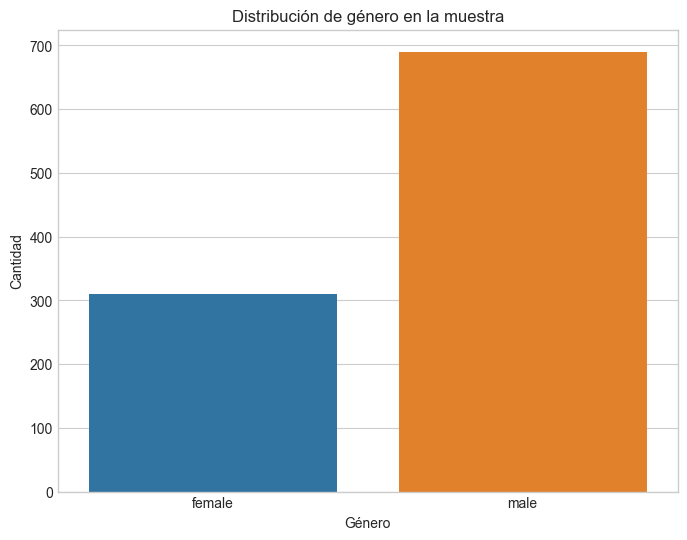

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(data=g_credit_data, x='genre', hue='genre')
plt.title("Distribución de género en la muestra")
plt.xlabel("Género")
plt.ylabel("Cantidad")
plt.show()

**Observaciones sobre la distribución de género:**

* Tenemos **una clara mayoría** del género masculino siendo en total 700 solicitantes de este género ante 300 del género femenino.

### 4.2 Tasas de aprobación por género

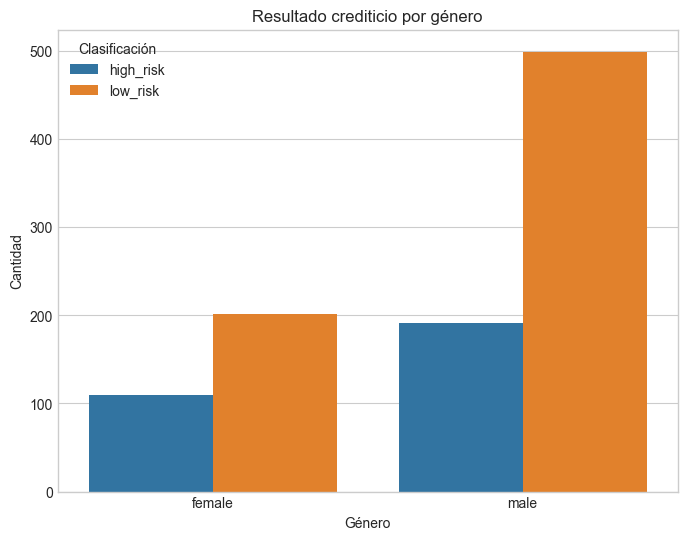

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(data=g_credit_data, x='genre', hue='target_label')
plt.title("Resultado crediticio por género")
plt.xlabel("Género")
plt.ylabel("Cantidad")
plt.legend(title="Clasificación")
plt.show()

**Análisis de la relación género-riesgo:**

Podemos ver que en el género femenino la diferencia de proporciones entre el bajo o alto riesgo crediticio no está tan marcada como en el género masculino, donde la mayoría son clasificados como de bajo riesgo. Esto sugiere que en términos de proporciones, a las solicitantes femeninas se les suele clasificar como de alto riesgo con mayor frecuencia.

Veamos esto de las proporciones con un gráfico más específico:

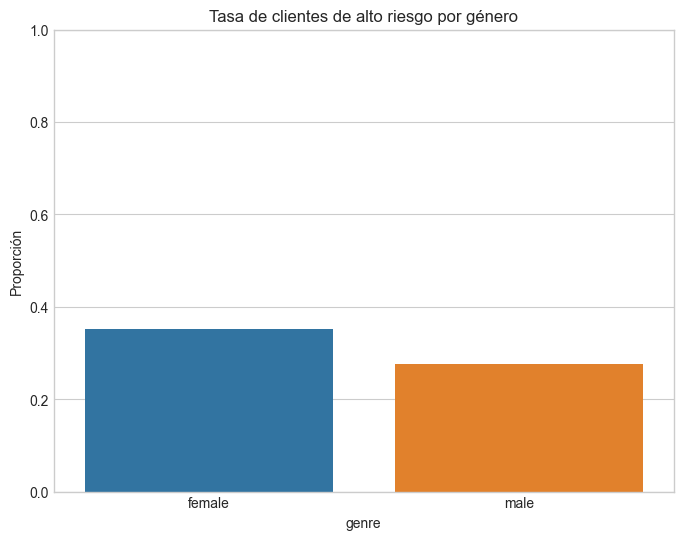

In [12]:
# Calculamos la tasa de alto riesgo por género
tasa_genero = g_credit_data.groupby('genre', observed= True)['target'].apply(lambda x: (x == 2).mean()).reset_index()
tasa_genero.columns = ['genre', 'tasa']

plt.figure(figsize=(8, 6))
sns.barplot(data=tasa_genero, x='genre', y='tasa', hue='genre')
plt.title("Tasa de clientes de alto riesgo por género")
plt.ylabel("Proporción")
plt.ylim(0, 1)
plt.show()

In [13]:
tasa_genero

,genre,tasa
0,female,0.351613
1,male,0.276812


**Hallazgos importantes sobre equidad de género:**

A partir del gráfico y tabla anteriores, podemos ver que los solicitantes clasificados como de alto riesgo son en mayor proporción femeninos (como ya habíamos notado en los gráficos anteriores). Más precisamente, la diferencia es de aproximadamente 8 puntos porcentuales entre géneros:

- **Mujeres**: 35.2% clasificadas como alto riesgo
- **Hombres**: 27.7% clasificados como alto riesgo

Esta disparidad es significativa y plantea interrogantes importantes sobre equidad:
- ¿Existe un sesgo preestablecido entre las personas que generaron la clasificación originalmente?
- ¿Podremos evitar este posible sesgo en nuestro modelo predictivo?

## 5. Conclusiones

Del análisis exploratorio realizado, podemos extraer las siguientes conclusiones clave:

1. **Variables numéricas relevantes:**
   - La duración del crédito muestra una clara relación con el riesgo: préstamos a más largo plazo tienden a ser clasificados como de mayor riesgo.
   - Solicitantes más jóvenes tienen mayor probabilidad de ser clasificados como de alto riesgo.
   - Montos de crédito más altos también se asocian moderadamente con clasificaciones de mayor riesgo.

2. **Variables categóricas importantes:**
   - El estado de la cuenta corriente es un fuerte predictor: saldos bajos se asocian con alto riesgo.
   - Ahorros bajos (<100 DM) se asocian con clasificaciones de alto riesgo.
   - Menor antigüedad laboral (menos de 1 año) está relacionada con clasificaciones de alto riesgo.
   - Propietarios de vivienda tienen menor probabilidad de ser clasificados como de alto riesgo.

3. **Consideraciones de equidad:**
   - Existe una disparidad notable en las tasas de clasificación de alto riesgo entre géneros (35.2% para mujeres vs 27.7% para hombres).
   - Esta diferencia de 8 puntos porcentuales plantea preocupaciones sobre posibles sesgos en la clasificación original.
   - Las variables relacionadas con ingresos, empleo y propiedad podrían estar actuando como proxies que amplifican disparidades de género.

### Implicaciones para el modelado de equidad

Este análisis preliminar sugiere que cualquier modelo predictivo construido sobre estos datos debe considerar cuidadosamente:

1. **Evaluación de métricas de equidad:** Será esencial evaluar métricas como disparidad de impacto e igualdad de oportunidades entre géneros.
2. **Técnicas de mitigación de sesgos:** Podría ser necesario aplicar técnicas como reponderación, reentrenamiento o ajustes post-procesamiento para garantizar decisiones equitativas.
3. **Variables sensibles:** El género y variables que puedan actuar como proxies (como tipo de vivienda o historial de empleo) requerirán especial consideración durante el modelado.

La pregunta fundamental que debemos responder es: ¿Existe un sesgo histórico en la clasificación original que nuestro modelo podría perpetuar? Los análisis posteriores y la implementación de prácticas de modelado justo nos ayudarán a abordar esta cuestión. 